In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score 
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/data_science/main/pca/wine.csv")
raw_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
raw_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
raw_data.duplicated().sum()

0

In [6]:
raw_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
raw_data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [8]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
raw_data.corr()['Type'].sort_values(ascending=False)

Type               1.000000
Alcalinity         0.517859
Nonflavanoids      0.489109
Malic              0.437776
Color              0.265668
Ash               -0.049643
Magnesium         -0.209179
Alcohol           -0.328222
Proanthocyanins   -0.499130
Hue               -0.617369
Proline           -0.633717
Phenols           -0.719163
Dilution          -0.788230
Flavanoids        -0.847498
Name: Type, dtype: float64

In [10]:
raw_data.skew().sort_values(ascending=False)

Magnesium          1.098191
Malic              1.039651
Color              0.868585
Proline            0.767822
Proanthocyanins    0.517137
Nonflavanoids      0.450151
Alcalinity         0.213047
Type               0.107431
Phenols            0.086639
Flavanoids         0.025344
Hue                0.021091
Alcohol           -0.051482
Ash               -0.176699
Dilution          -0.307285
dtype: float64

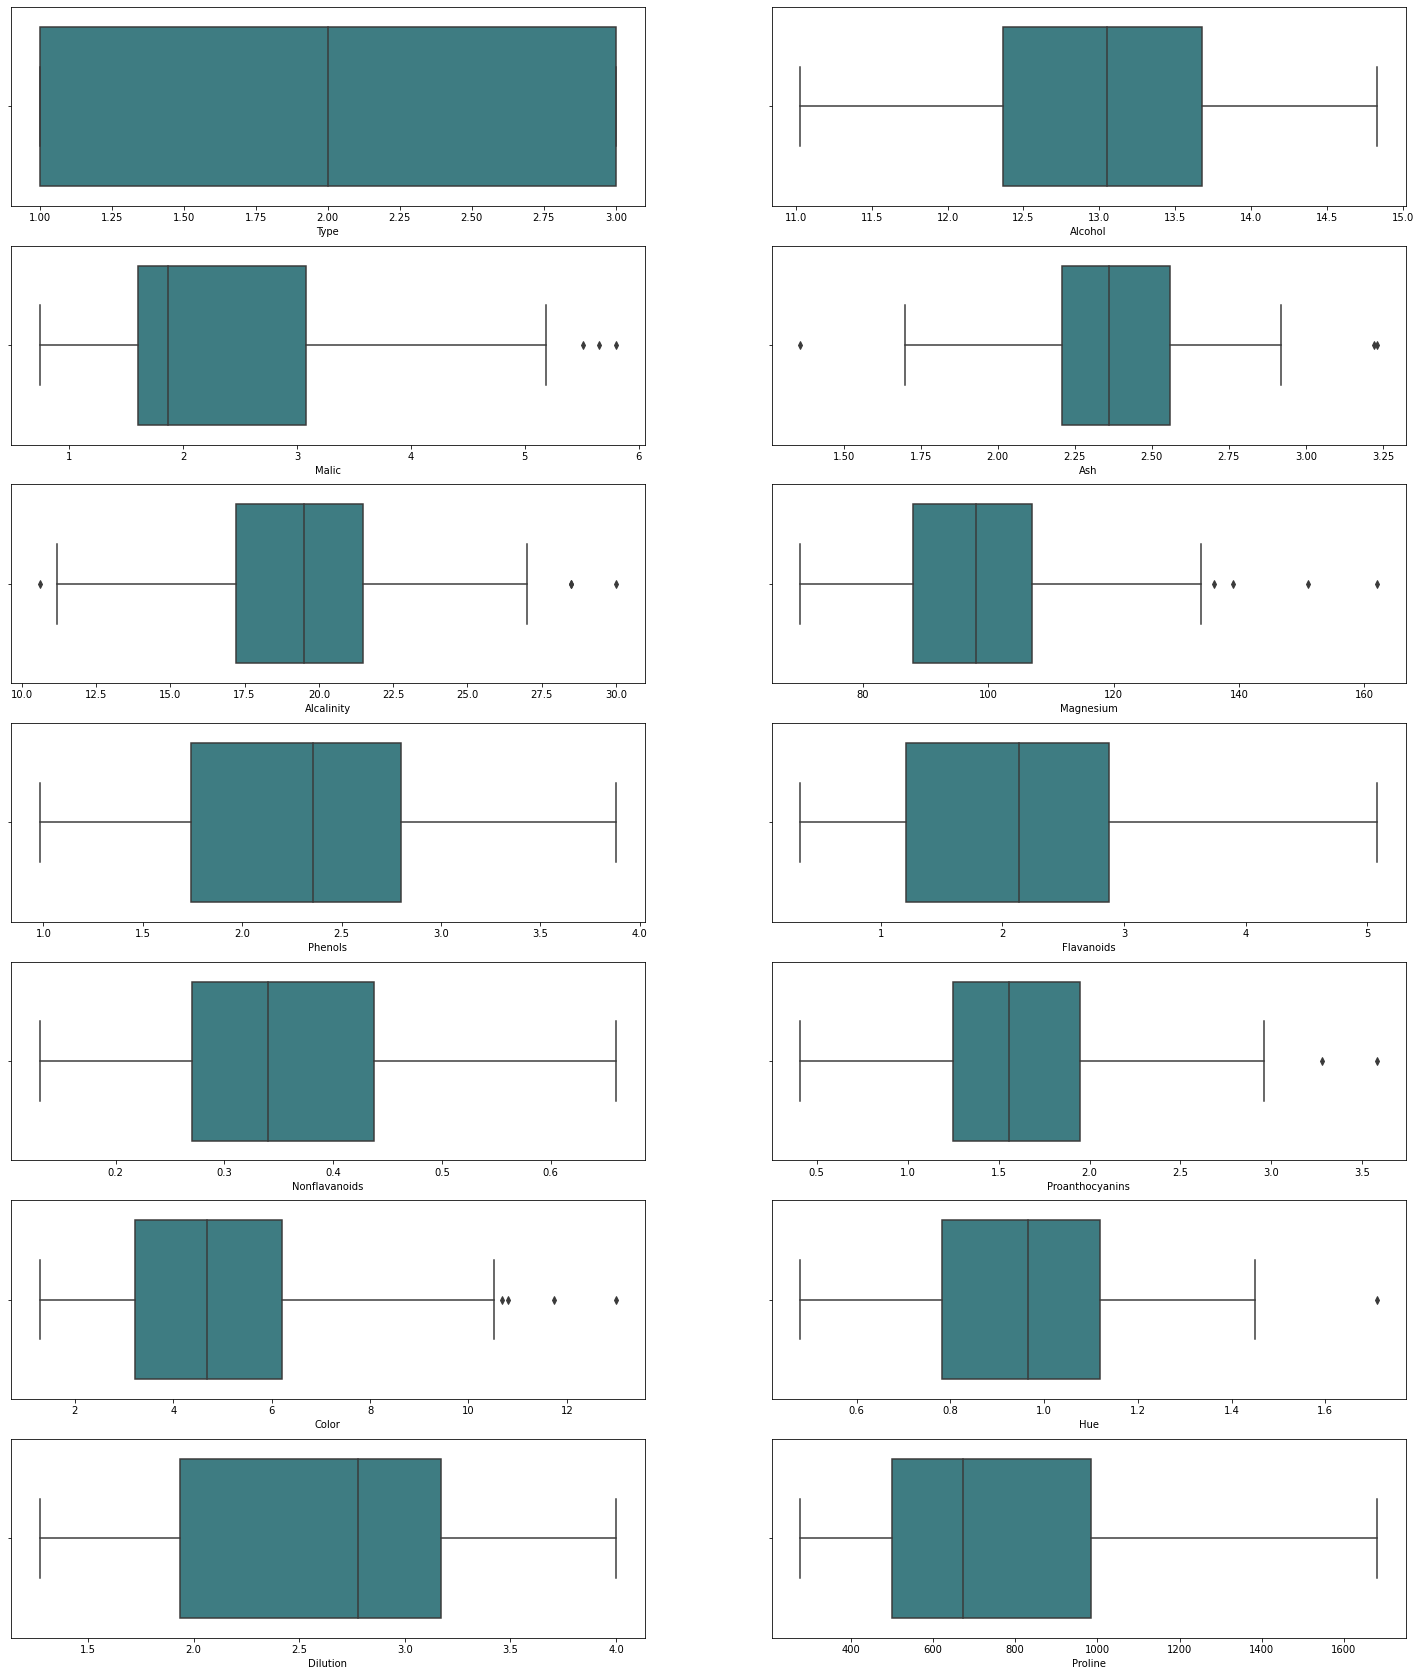

In [11]:
fig, axes=plt.subplots(7,2,figsize=(25,30))
axe = axes.flatten()
for i,feature in enumerate(raw_data.columns):
    sns.boxplot(data=raw_data, x=feature,palette='crest', ax=axe[i]) 
plt.show()

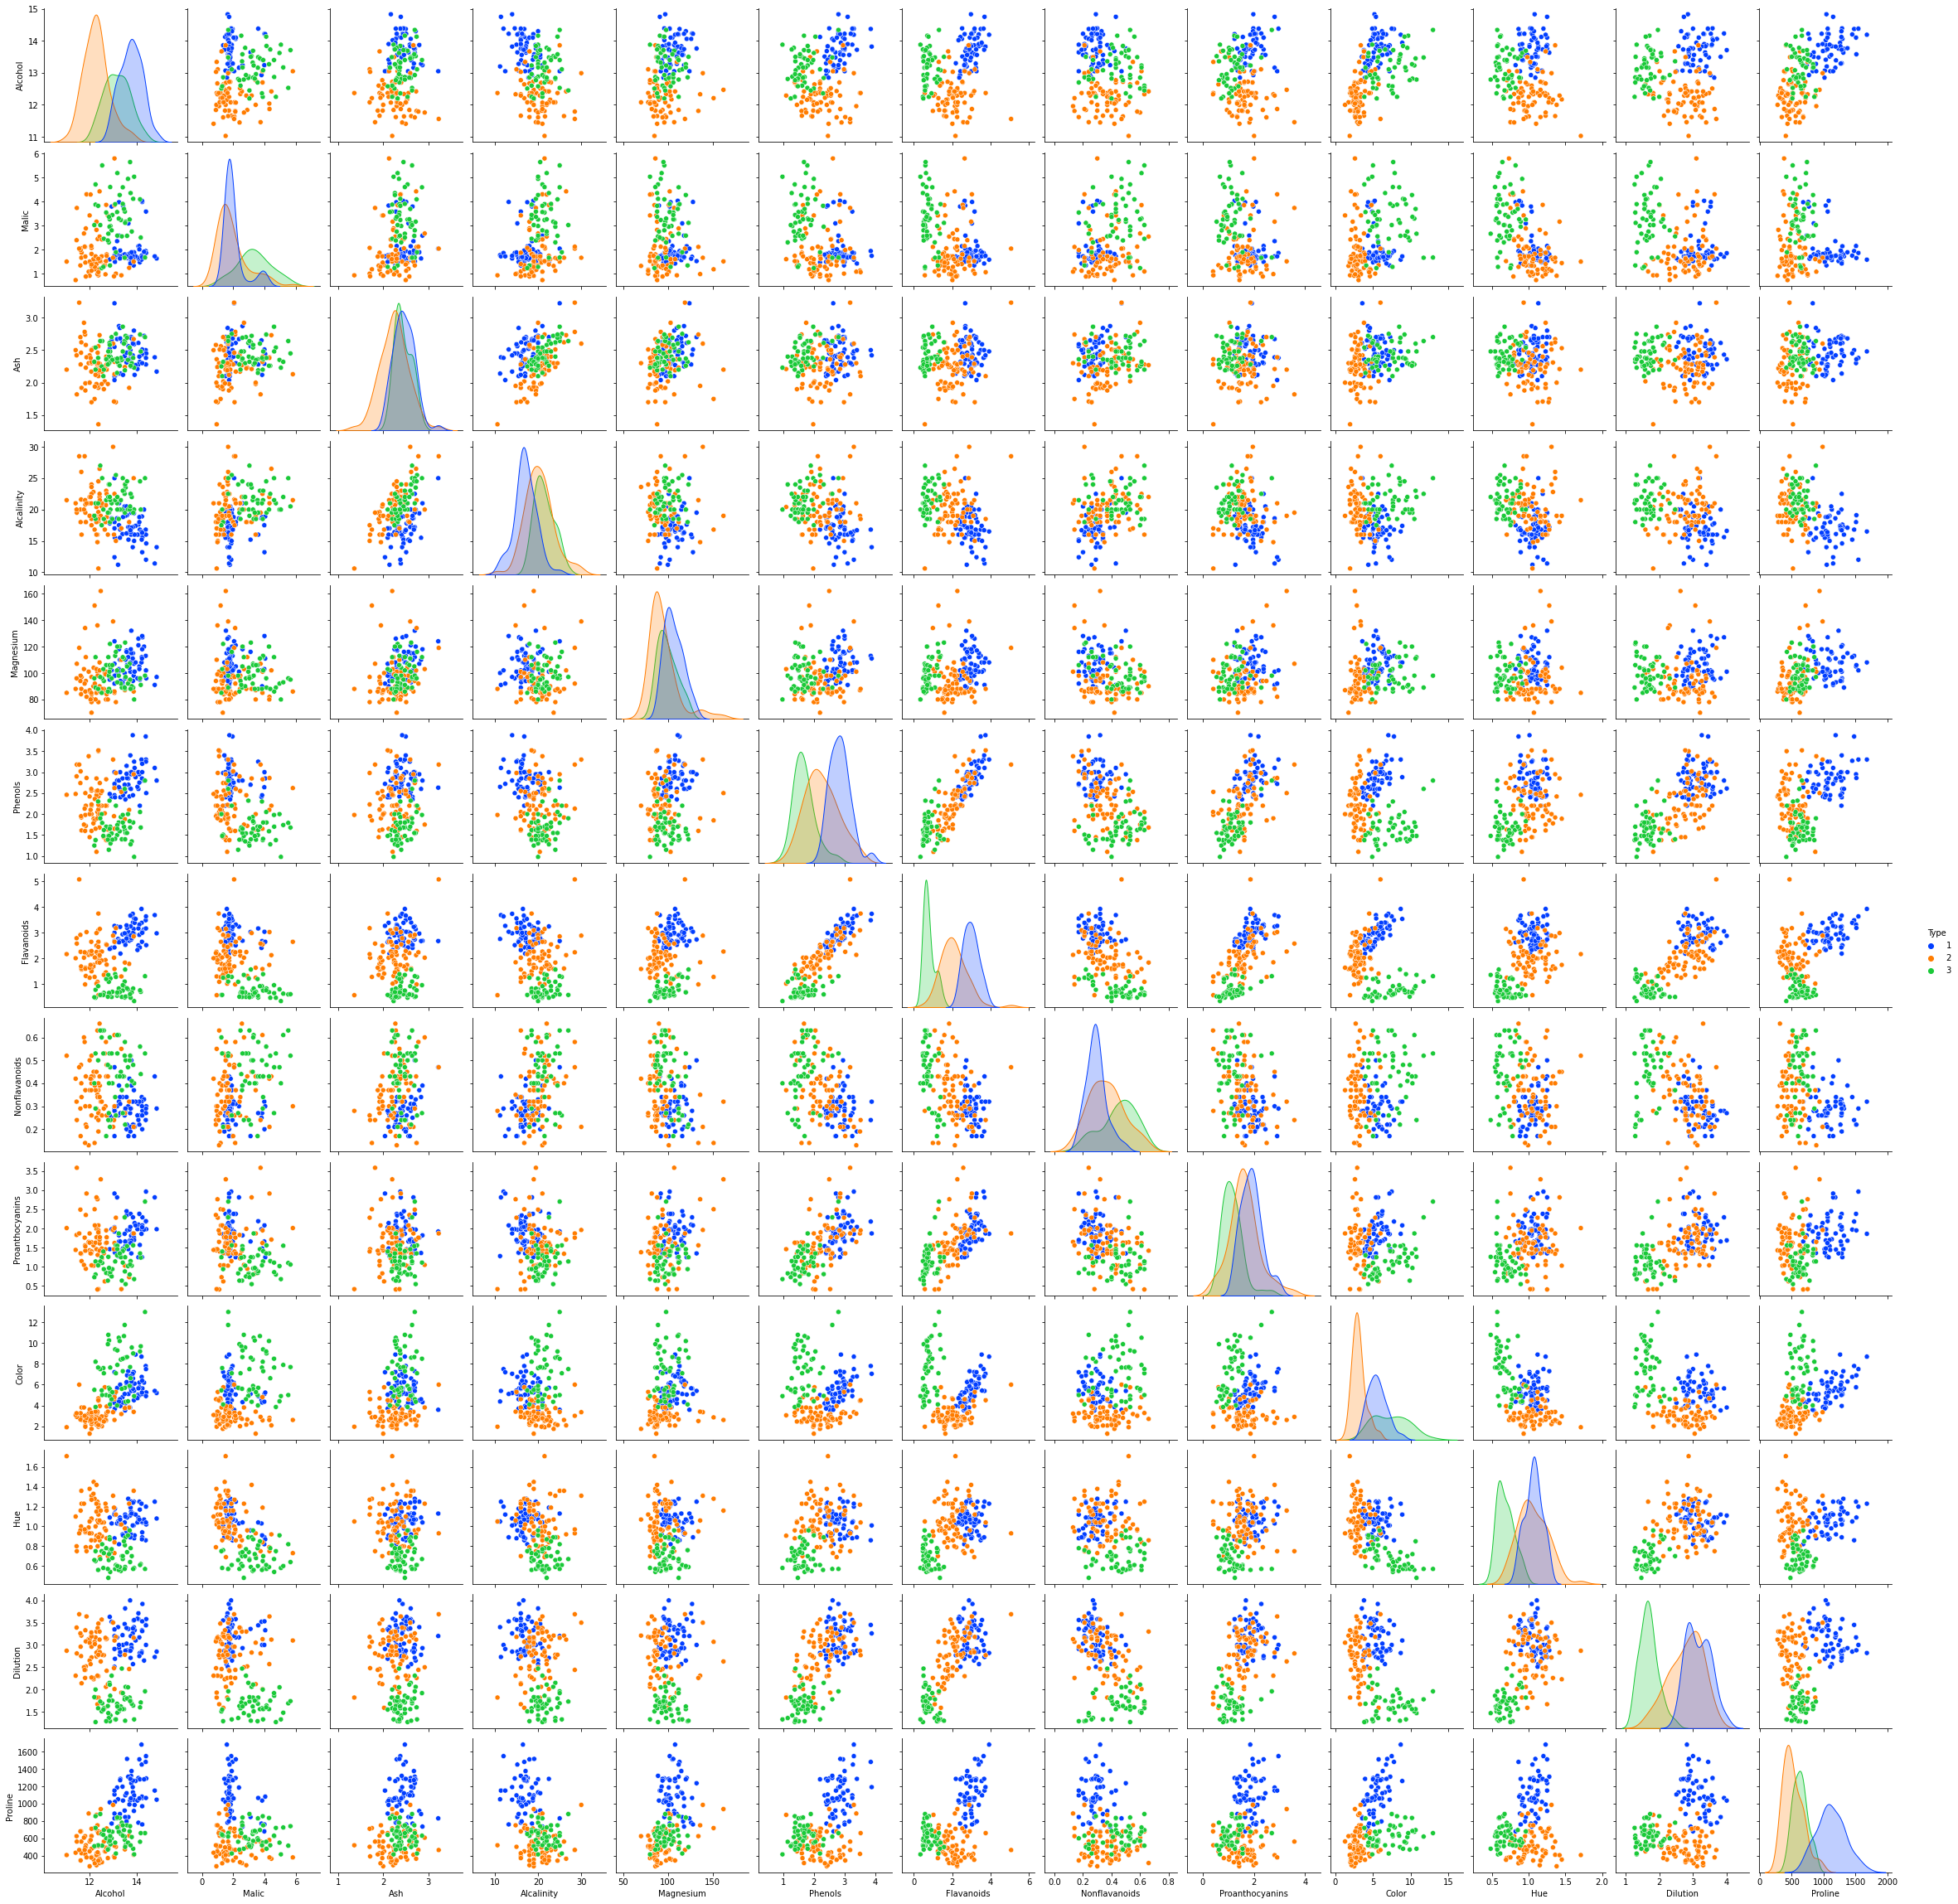

In [12]:
sns.pairplot(raw_data,palette="bright", hue='Type')

In [39]:
data =raw_data.drop('Type',axis=1)

In [40]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(data)
scaled_data.shape

(178, 13)

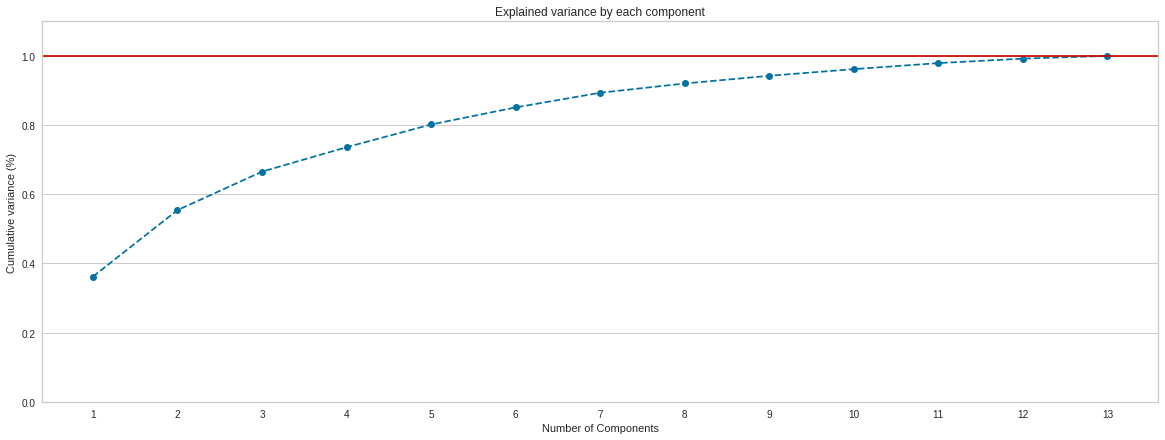

In [41]:
pca_variance = PCA()
pca_variance.fit(scaled_data)

plt.figure(figsize=(20,7))
xi = np.arange(1, 1+scaled_data.shape[1], step=1)
yi = np.cumsum(pca_variance.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+scaled_data.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [42]:
pca = PCA(n_components=3)
pca_scaled = pca.fit_transform(scaled_data)

pca_sc_df = pd.DataFrame(data = pca_scaled, columns = ['pc1', 'pc2','pc3'])
pca_sc_df.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


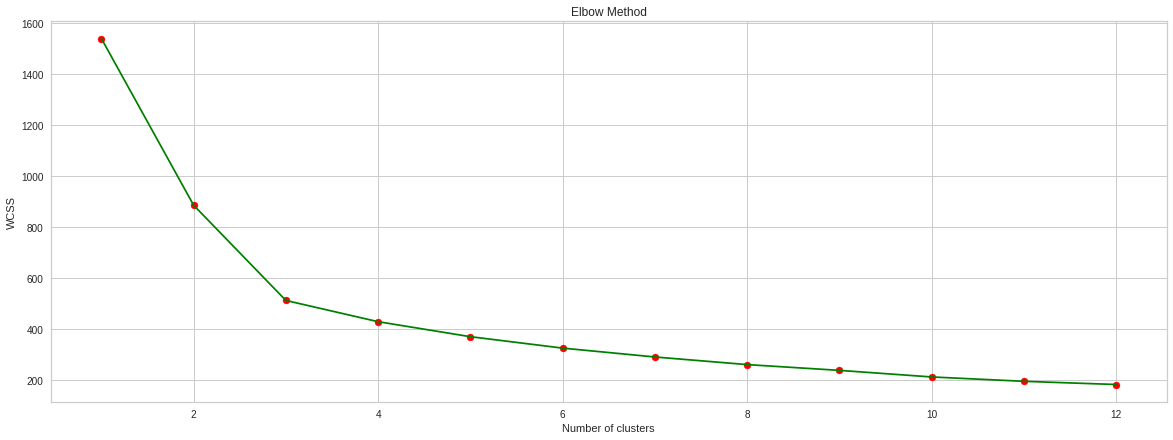

In [43]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_sc_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20,7))   
plt.plot(range(1, 13), wcss,color='green')
plt.scatter(range(1,13),wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


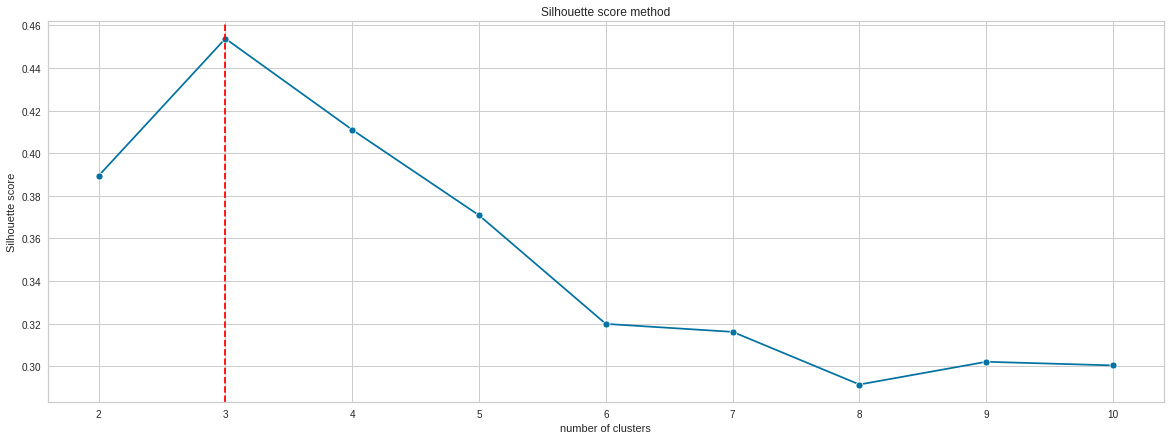

In [44]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_sc_df)
    clusters_inertia.append(KM_est.inertia_) 
    silhouette_avg = silhouette_score(pca_sc_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

fig, ax = plt.subplots(figsize=(20,7))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.show()

In [46]:
kmeans_clf = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)
prediction_kmeans = kmeans_clf.fit_predict(pca_sc_df)
prediction_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Text(0, 0.5, 'Euclidean distances')

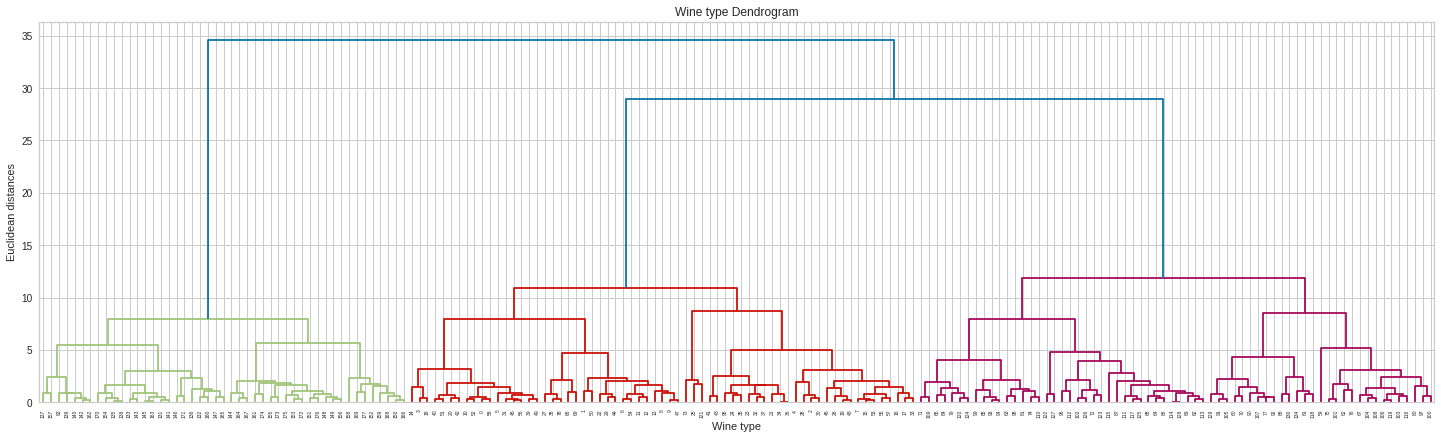

In [47]:
plt.figure(figsize=(25,7))
dendrogram_ward = sch.dendrogram(sch.linkage(pca_sc_df, method  = "ward"))
plt.title('Wine type Dendrogram')
plt.xlabel('Wine type')
plt.ylabel('Euclidean distances')

In [48]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
prediction_hier = agg_clustering.fit_predict(pca_sc_df)

In [49]:
data['Type_actual'] = raw_data['Type']
data['Type_kmeans'] = prediction_kmeans
data['Type_hier'] = prediction_hier
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_actual,Type_kmeans,Type_hier
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,2


In [50]:
data.groupby('Type_actual').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_kmeans,Type_hier
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type_actual,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.00000,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.15493,0.183099
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,1.00000,0.958333


In [51]:
data.groupby('Type_kmeans').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_actual,Type_hier
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type_kmeans,,,,,,,,,,,,,,,
0,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125,2.000000,0.093750
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,2.941176,0.921569
2,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095,1.063492,1.968254


In [52]:
data.groupby('Type_hier').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_actual,Type_kmeans
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type_hier,,,,,,,,,,,,,,,
0,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394,2.030303,0.090909
1,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277,2.978723,1.000000
2,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846,1.092308,1.907692


In [53]:
print(data['Type_actual'].value_counts())
print(data['Type_kmeans'].value_counts())
print(data['Type_hier'].value_counts())

2    71
1    59
3    48
Name: Type_actual, dtype: int64
0    64
2    63
1    51
Name: Type_kmeans, dtype: int64
0    66
2    65
1    47
Name: Type_hier, dtype: int64


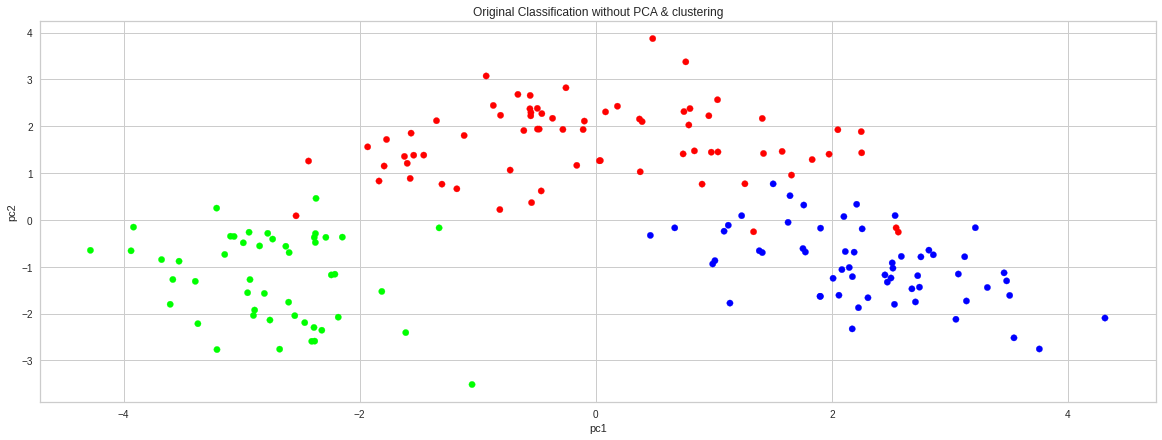

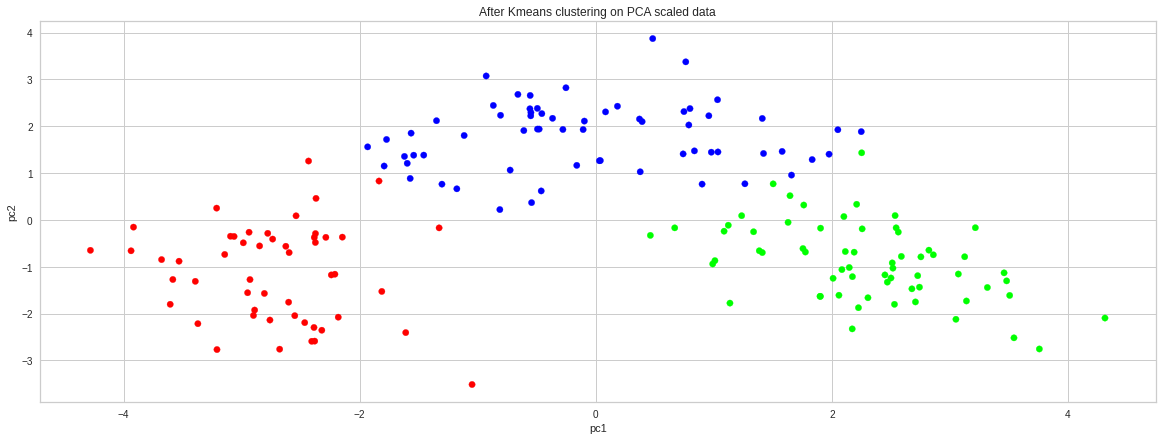

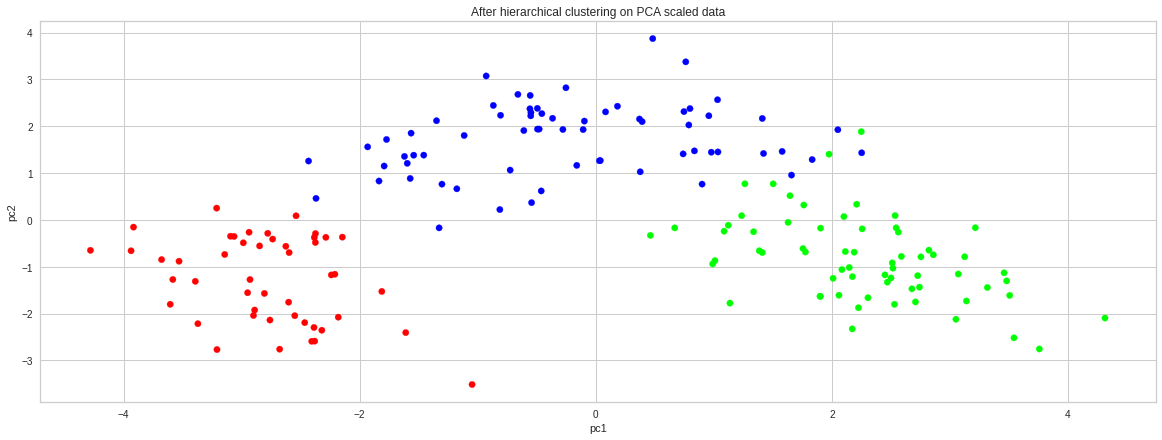

In [54]:
plt.figure(figsize=(20,7))
plt.scatter(pca_sc_df.iloc[:,0], pca_sc_df.iloc[:,1], c=data['Type_actual'], cmap="brg", s=40)
plt.title('Original Classification without PCA & clustering')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

plt.figure(figsize=(20,7))
plt.scatter(pca_sc_df.iloc[:,0], pca_sc_df.iloc[:,1], c=data['Type_kmeans'], cmap="brg", s=40)
plt.title('After Kmeans clustering on PCA scaled data')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

plt.figure(figsize=(20,7))
plt.scatter(pca_sc_df.iloc[:,0], pca_sc_df.iloc[:,1], c=data['Type_hier'], cmap="brg", s=40)
plt.title('After hierarchical clustering on PCA scaled data')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [55]:
df = data.copy()

In [56]:
df['Type_changed'] = data['Type_actual']

In [59]:
df['Type_changed'] = df['Type_changed'].replace([1,2,3],[2,0,1])

In [75]:
Type_changed= df["Type_changed"].values
Type_kmeans = df["Type_kmeans"].values
Type_hier = df["Type_hier"].values

accuracy_kmeans = accuracy_score(Type_changed, Type_kmeans)
accuracy_hier = accuracy_score(Type_changed, Type_hier)

In [76]:
print('Kmeans accuracy : ', accuracy_kmeans*100)
print('Hierarchy accuracy : ',accuracy_hier*100)

Kmeans accuracy :  96.06741573033707
Hierarchy accuracy :  94.9438202247191
